# Research Summary
This research project was designed to analyze the stability of various financial risk metrics between 6-month periods. The specific metrics analyzed were:
- Volatility of returns (standard deviation of weekly returns)
- Pairwise correlations (correlation between the weekly returns of each pair of stocks in the universe)
- Market exposure (each stock’s market beta; this was calculated using the correlation between the weekly returns of the market and the particular stock, as well as the standard deviation of both sets of weekly returns  

Once calculated, each risk metric was discretized (separated into bins) for each 6-month period. Two methods for discretization were used:
- Deciles (separating each period’s values into 10 equal-sized bins), and
- Standard errors (separating each period’s values into 10 bins based on their normalized values. Each bin had a width of 0.5 period standard deviations, with boundaries at: (explain))

**Chapter 1: Volatility**

*Data collection*  
To calculate volatility, we queried daily return data from the WRDS CRSP database. We selected all stocks from 1950 onward with a market capitalization of at least the equivalent of $10 million 2020 USD. We adjusted for inflation using the GDP deflator, using one dollar value for each year.

*Metric calculation*  
The daily returns we obtained were then combined into weekly returns through geometric expansion <formula>. For each stock, weeks with less than 5 days due to market holidays were kept; any other weeks with missing data were dropped. 

These weekly returns were then separated into periods of approximately 26 weeks, with occasional adjustments to ensure each period started in the first week of either January or July. The standard deviation of weekly returns for each 26-week period was calculated.

*Discretization*  
Next, the stocks in each period were separated into 10 bins based on their standard deviations. This separation was done using both deciles (separating the stocks into 10 bins of equal size) and standard errors (separating the stocks by the standard error of their standard deviations, and binning them into 10 bins based on those values).

*Markov modeling*  
Finally, the stability of both discretizations was analyzed using Markov modeling. A 10x10 transition matrix was created, and for each stock, transitions between consecutive periods were recorded in the matrix. For each two consecutive periods A and B, if a stock is in bin i in period A and j in period B, then cell (i, j) of the matrix is incremented by one. This is repeated for each stock in the universe. Afterwards, each row of the matrix is normalized (scaled to sum to 1). This means that each row i of the matrix contains the probabilities (in each element j) that a given stock will move from bin i to bin j.

*Average values*  
During the Markov modeling process, the average volatility value for each cell in the transition matrix is also calculated. For each transition between period A and B, the volatility value for period A is added to one matrix, and the value for period B is added to another. After the enumeration of stocks & periods, before the normalization of the transition matrix, both matrices (A values and B values) are divided element-wise by the cells of the transition matrix, providing average values.

**Chapter 2: Correlations**

*Data collection*  
No further data was collected for this section.

*Metric calculation*  
To calculate pairwise stock correlations, we used the weekly returns calculated in the previous section. For each of the same 26-week periods, we calculated the correlation between the weekly returns of each pair of stocks.

*Discretization*  
We discretized the correlations in the same way as the previous chapter, using both deciles and standard errors

*Markov modeling*  
We performed Markov modeling in the same way as the previous chapter, for both decile and standard error discretizations.

*Average values*  
The average correlation was also calculated for each transition matrix cell in the same way as the previous section.

**Chapter 3: Beta**

*Data collection*  
We collected daily market index return data from the WRDS CRSP database to reference for market exposure. This data was combined into 26-week periods 

*Metric calculation*  
To calculate pairwise stock correlations, we used the weekly returns calculated in the previous section. For each of the same 26-week periods, we calculated the correlation between the weekly returns of each pair of stocks.

*Discretization*  
We discretized the correlations in the same way as the previous chapter, using both deciles and standard errors

*Markov modeling*  
We performed Markov modeling in the same way as the previous chapter, for both decile and standard error discretizations.

*Average values*  
The average correlation was also calculated for each transition matrix cell in the same way as the previous section.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n_decades = 7

## Results
### Chapter 1: Volatility
#### Transition matrices

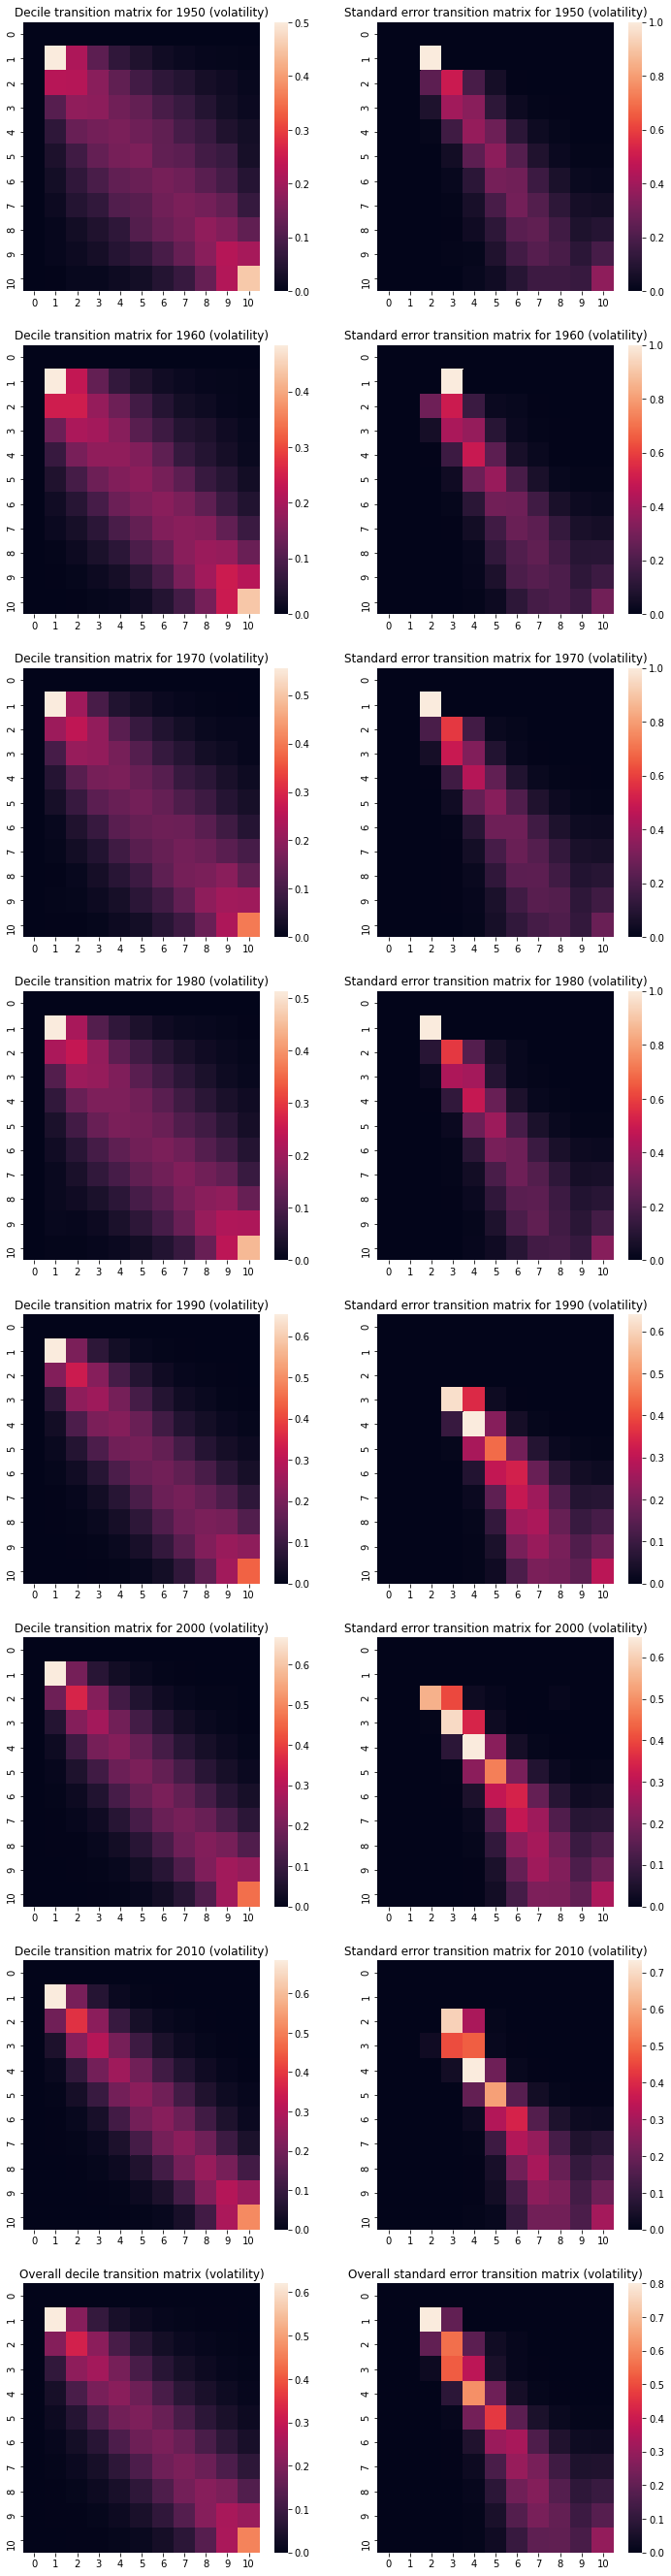

In [6]:
# transition matrices
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch1/transition_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch1/transition_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Decile transition matrix for {1950 + i * 10} (volatility)')
    axes[i][1].set_title(f'Standard error transition matrix for {1950 + i * 10} (volatility)')
    
mat = np.load(f'wrds_results/ch1/transition_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch1/transition_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall decile transition matrix (volatility)')
axes[-1][1].set_title(f'Overall standard error transition matrix (volatility)')
    
plt.show()

### Averages - deciles

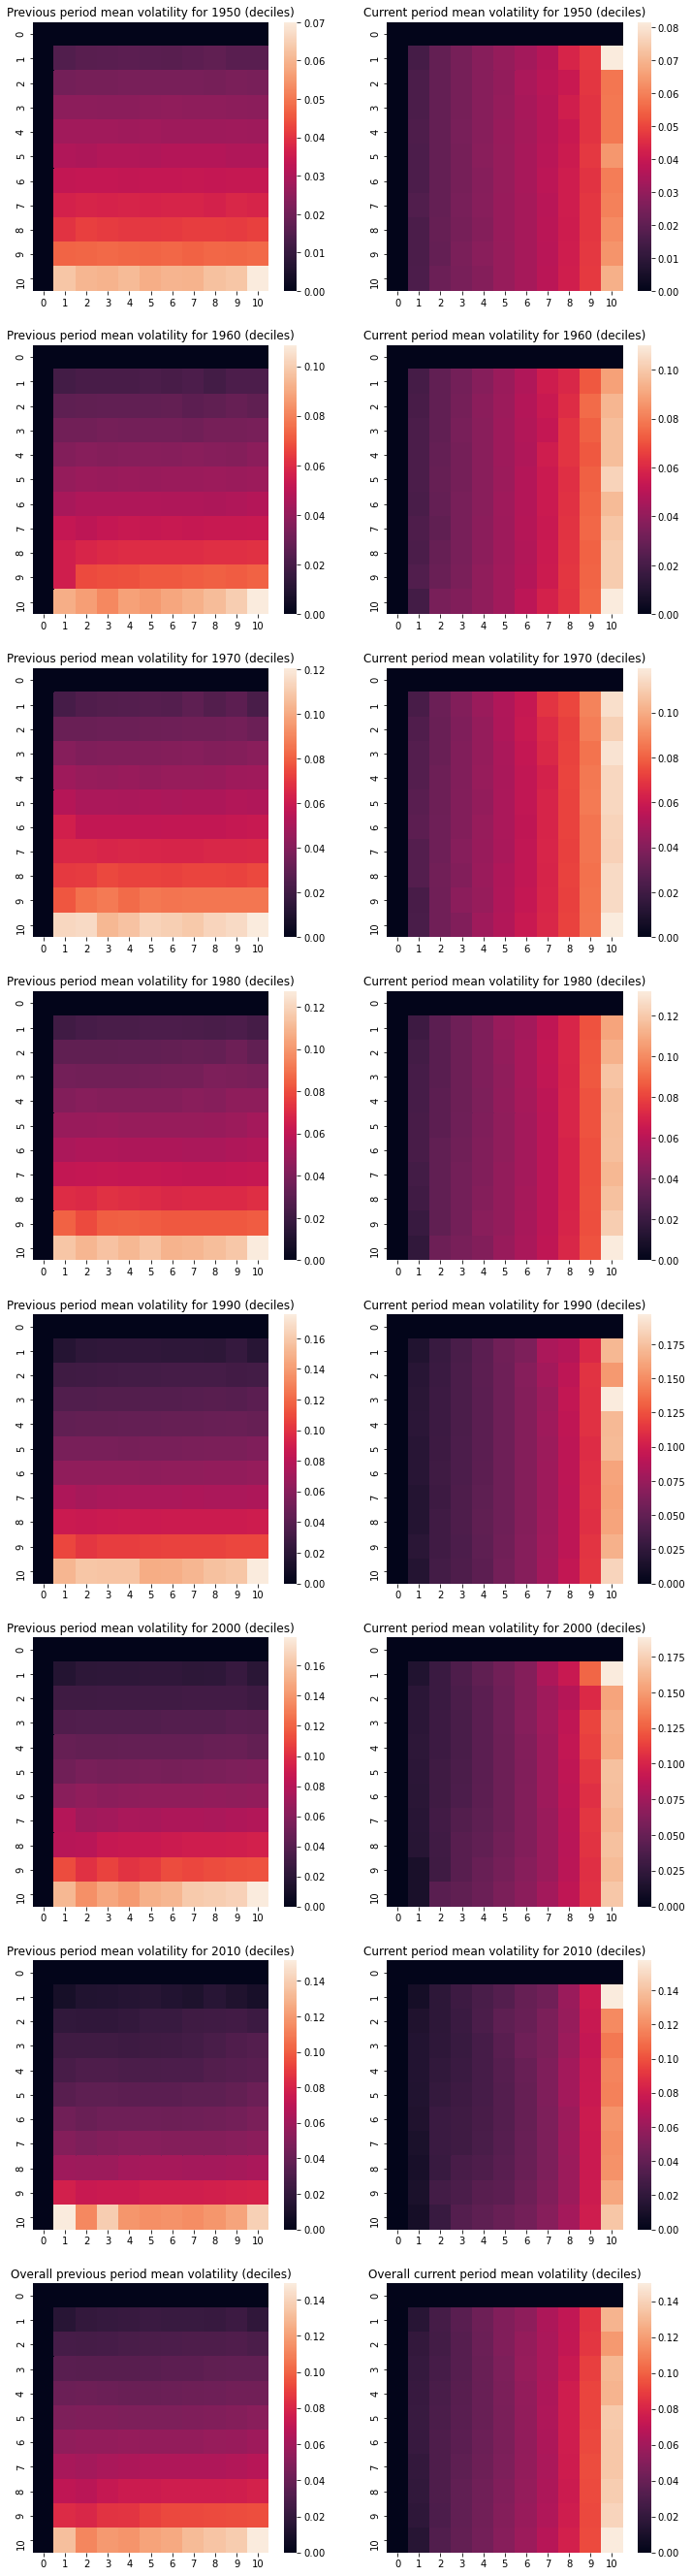

In [8]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch1/prev_average_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch1/post_average_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean volatility for {1950 + i * 10} (deciles)')
    axes[i][1].set_title(f'Current period mean volatility for {1950 + i * 10} (deciles)')
    
mat = np.load(f'wrds_results/ch1/prev_average_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch1/post_average_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean volatility (deciles)')
axes[-1][1].set_title(f'Overall current period mean volatility (deciles)')
    
plt.show()

### Averages - standard error

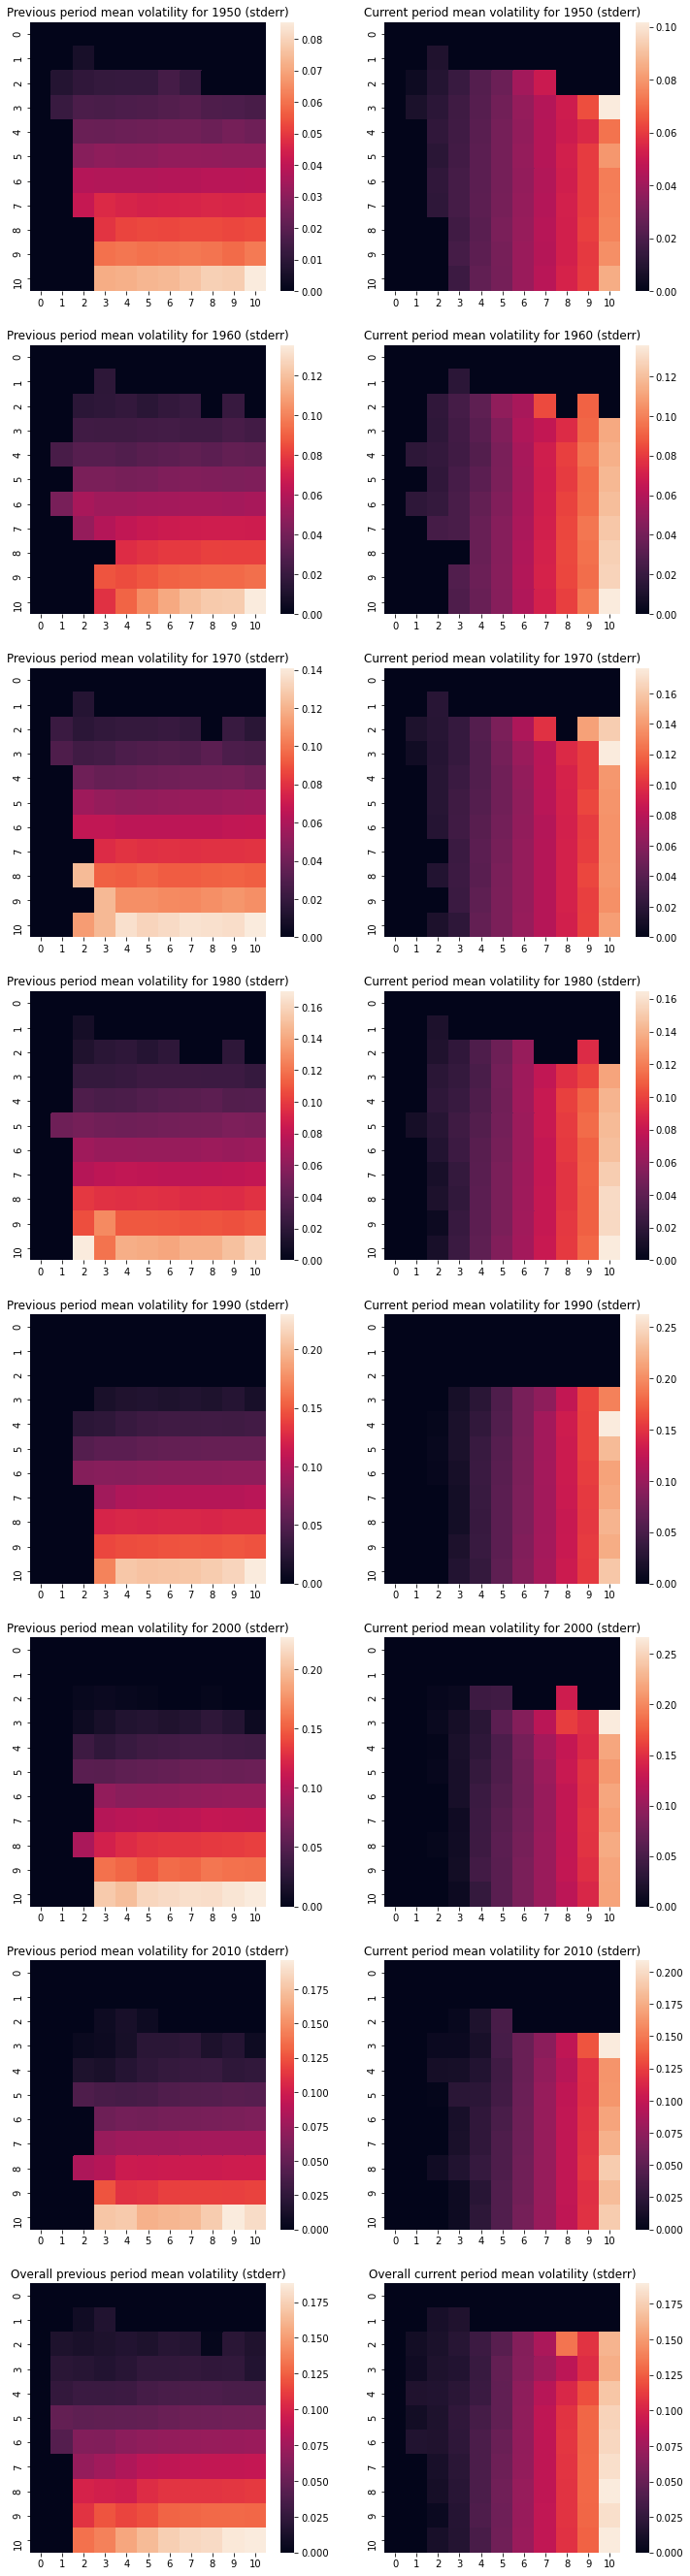

In [9]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch1/prev_average_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch1/post_average_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean volatility for {1950 + i * 10} (stderr)')
    axes[i][1].set_title(f'Current period mean volatility for {1950 + i * 10} (stderr)')
    
mat = np.load(f'wrds_results/ch1/prev_average_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch1/post_average_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean volatility (stderr)')
axes[-1][1].set_title(f'Overall current period mean volatility (stderr)')
    
plt.show()

### Chapter 2: Correlations
#### Transition matrices

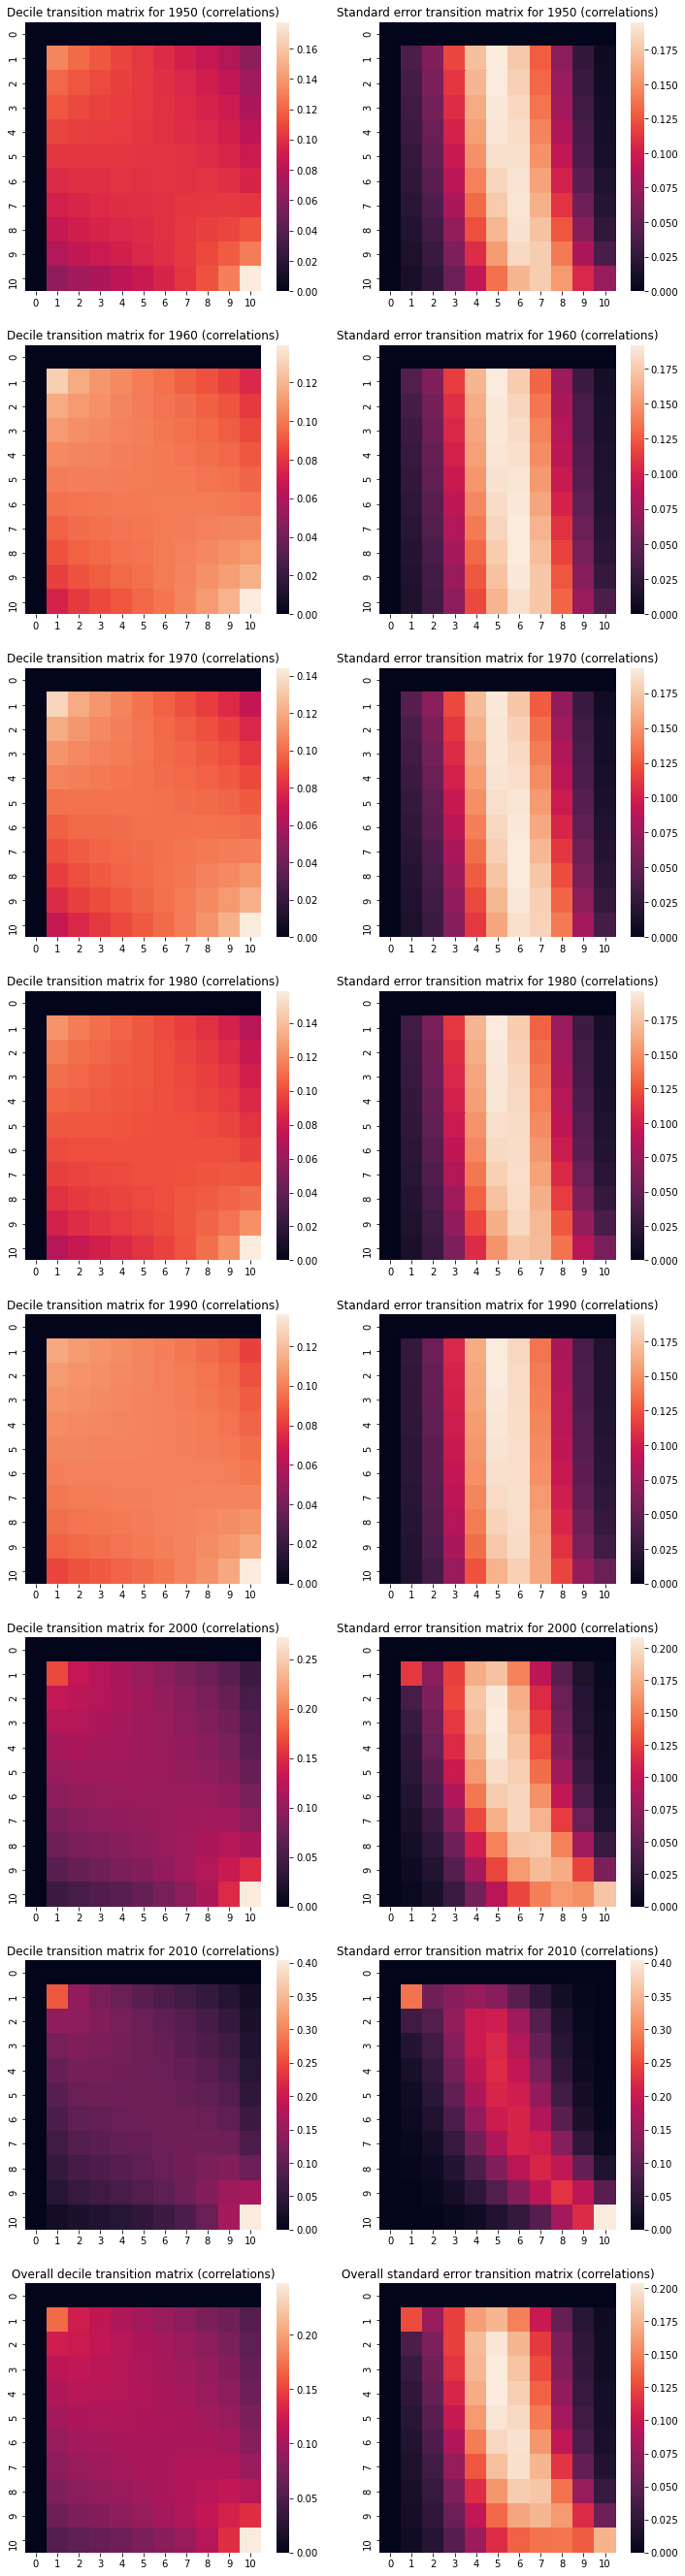

In [4]:
# transition matrices
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch2/transition_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch2/transition_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Decile transition matrix for {1950 + i * 10} (correlations)')
    axes[i][1].set_title(f'Standard error transition matrix for {1950 + i * 10} (correlations)')
    
mat = np.load(f'wrds_results/ch2/transition_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch2/transition_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall decile transition matrix (correlations)')
axes[-1][1].set_title(f'Overall standard error transition matrix (correlations)')
    
plt.show()

### Averages - deciles

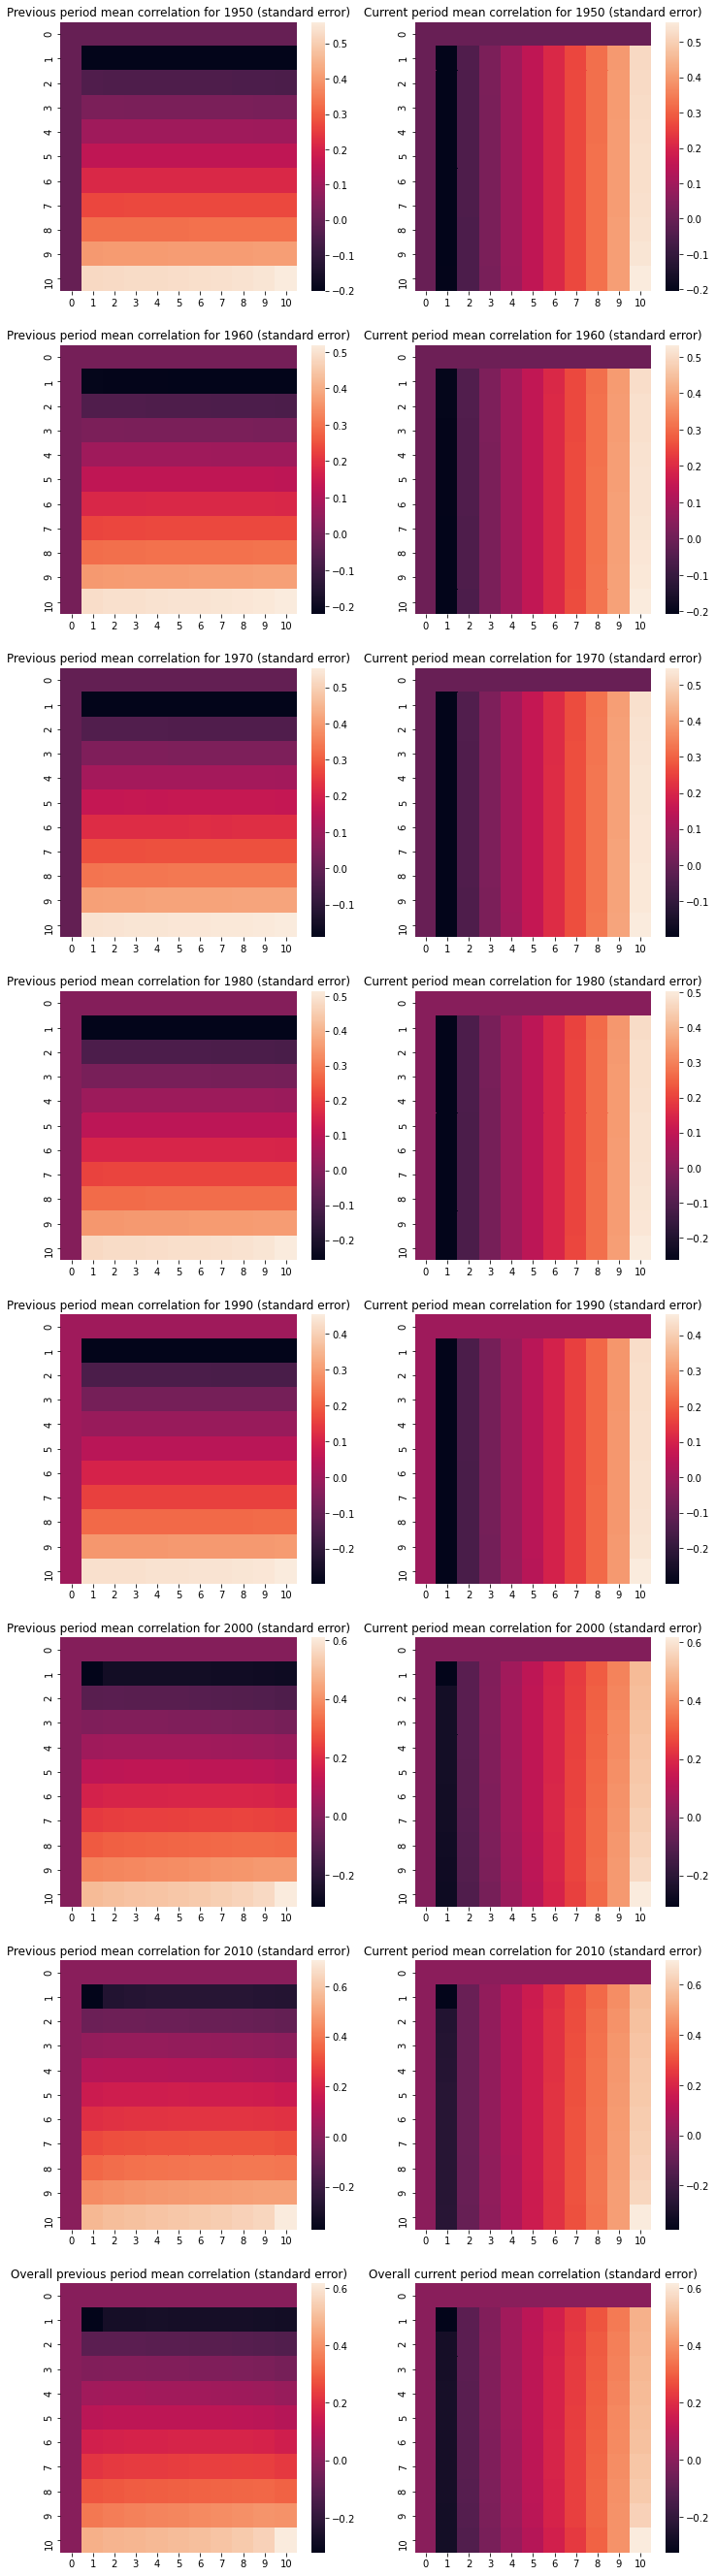

In [13]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch2/prev_avg_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch2/post_avg_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean correlation for {1950 + i * 10} (standard error)')
    axes[i][1].set_title(f'Current period mean correlation for {1950 + i * 10} (standard error)')
    
mat = np.load(f'wrds_results/ch2/prev_avg_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch2/post_avg_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean correlation (standard error)')
axes[-1][1].set_title(f'Overall current period mean correlation (standard error)')
    
plt.show()

### Averages - standard error

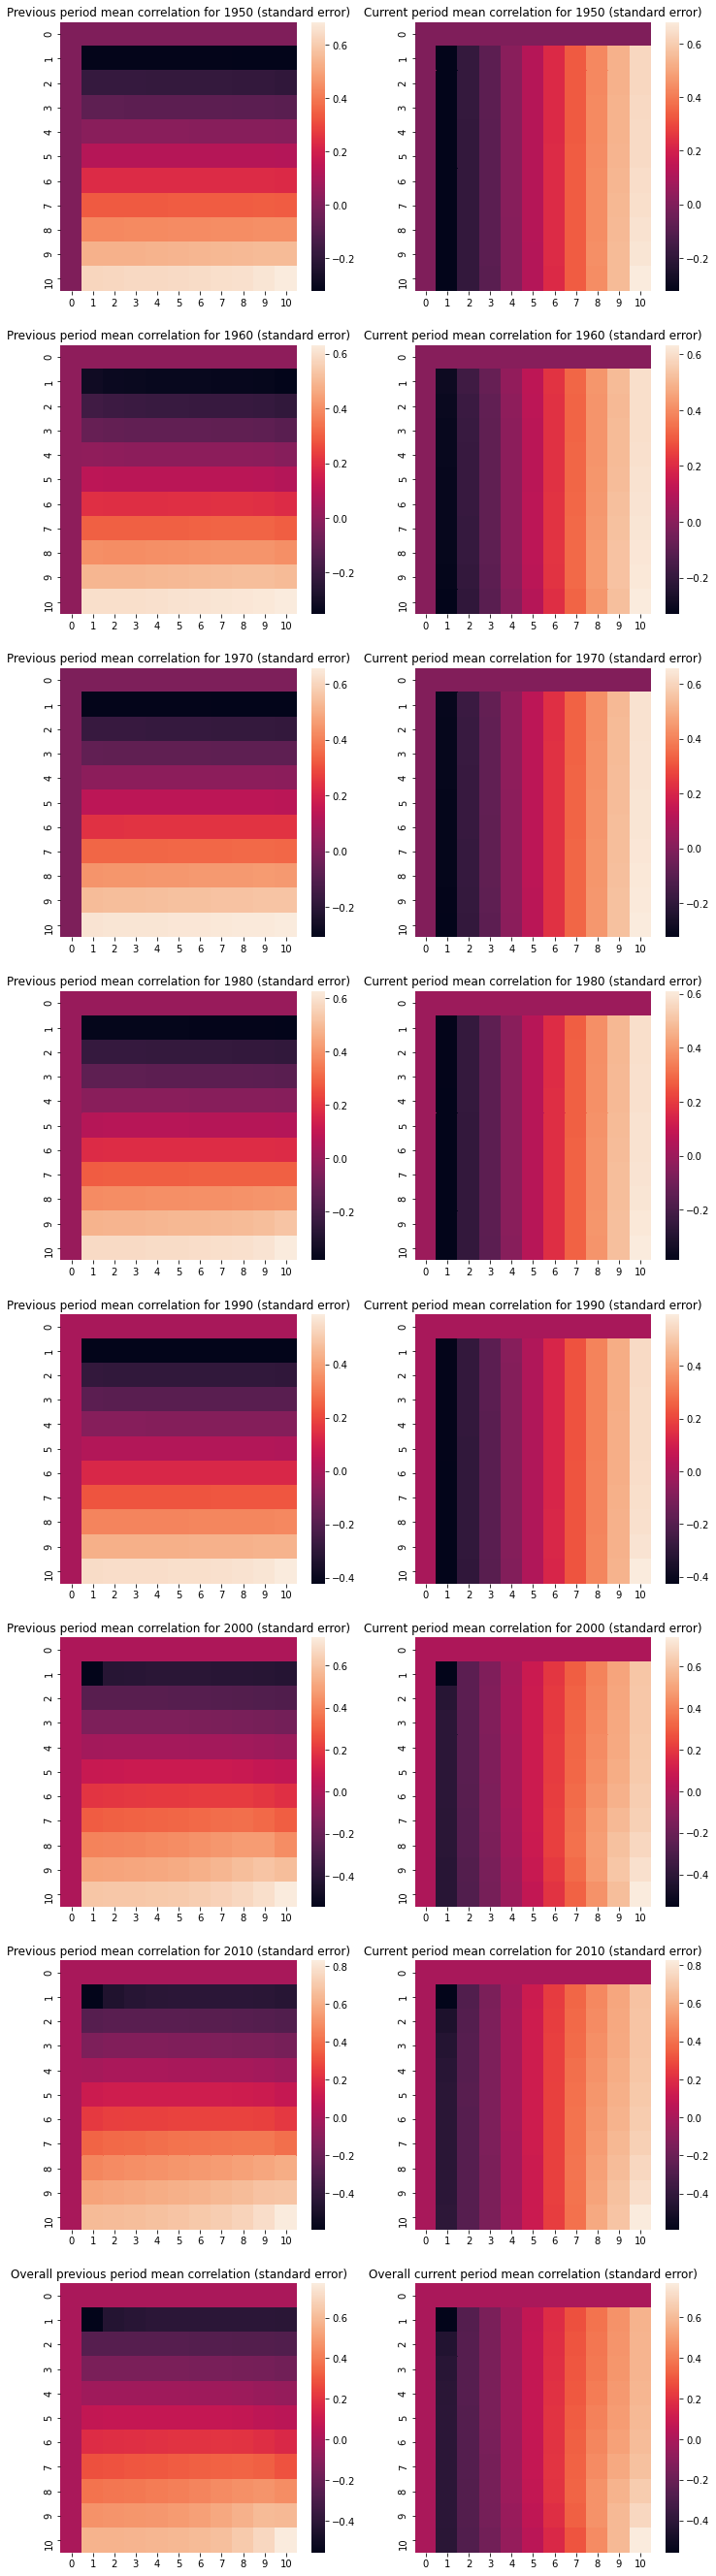

In [14]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch2/prev_avg_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch2/post_avg_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean correlation for {1950 + i * 10} (standard error)')
    axes[i][1].set_title(f'Current period mean correlation for {1950 + i * 10} (standard error)')
    
mat = np.load(f'wrds_results/ch2/prev_avg_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch2/post_avg_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean correlation (standard error)')
axes[-1][1].set_title(f'Overall current period mean correlation (standard error)')
    
plt.show()

### Chapter 3: Market Beta
#### Transition matrices

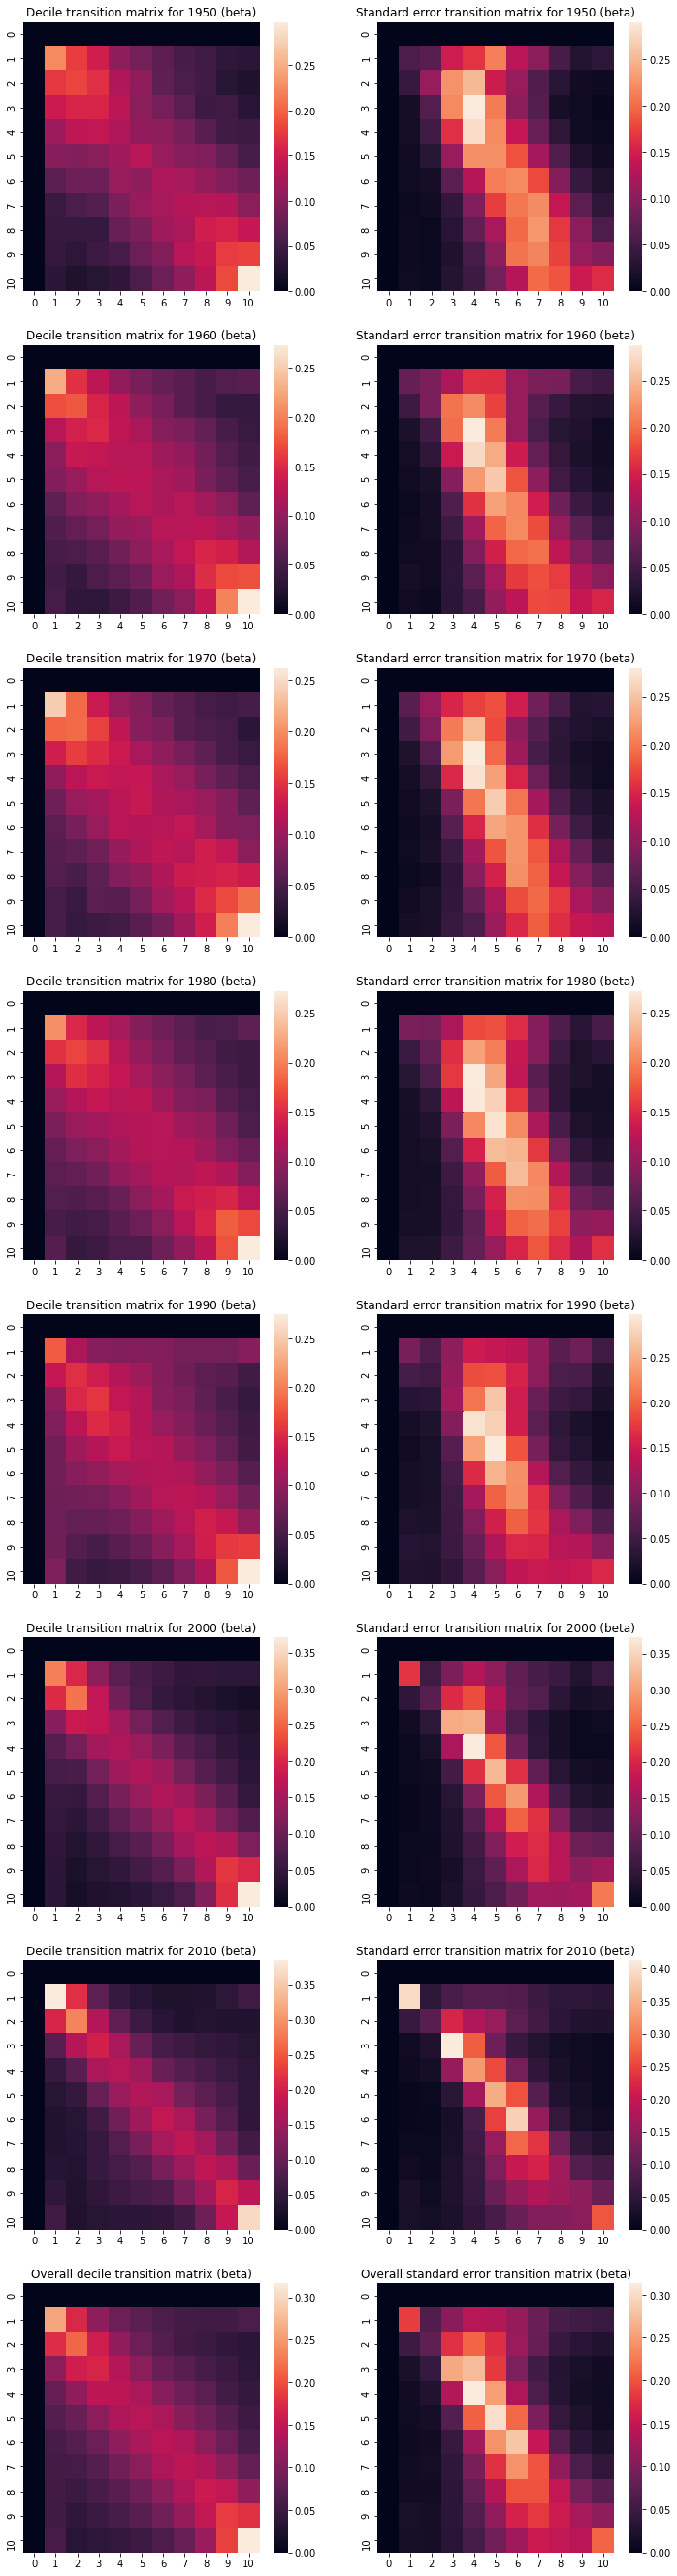

In [18]:
# transition matrices
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch3/transition_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch3/transition_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Decile transition matrix for {1950 + i * 10} (beta)')
    axes[i][1].set_title(f'Standard error transition matrix for {1950 + i * 10} (beta)')
    
mat = np.load(f'wrds_results/ch3/transition_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch3/transition_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall decile transition matrix (beta)')
axes[-1][1].set_title(f'Overall standard error transition matrix (beta)')
    
plt.show()

### Averages - deciles

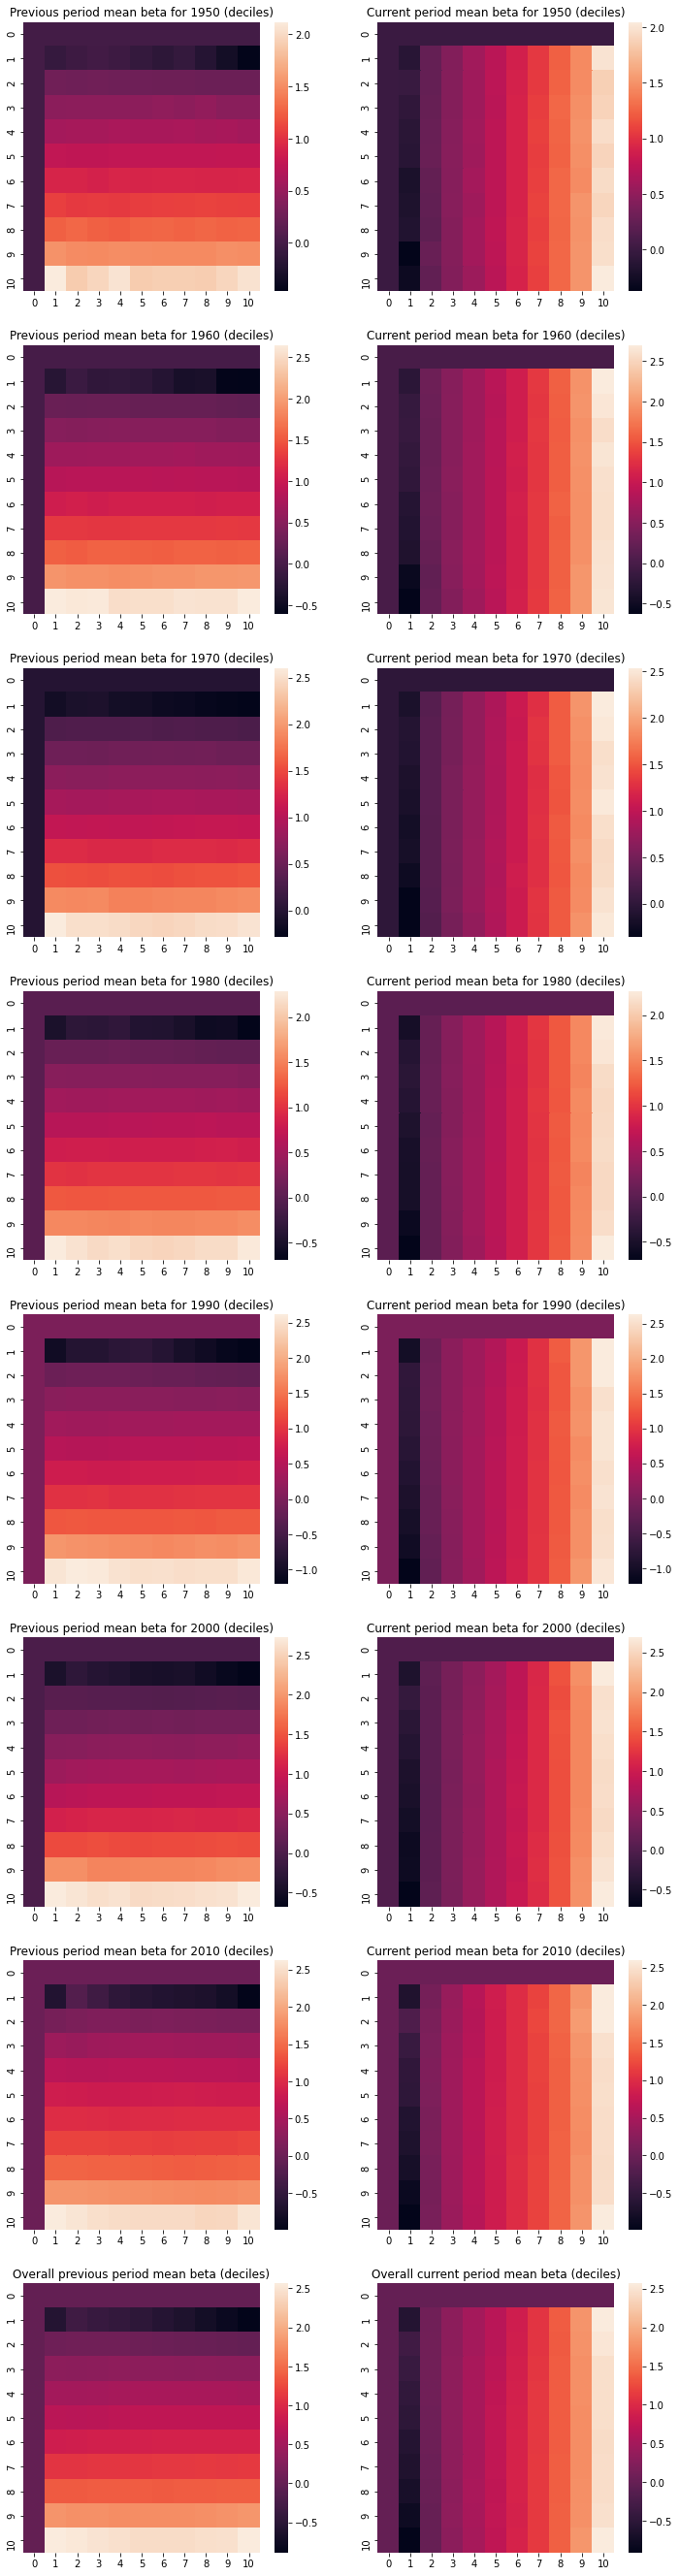

In [19]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch3/prev_average_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch3/post_average_mat_deciles_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean beta for {1950 + i * 10} (deciles)')
    axes[i][1].set_title(f'Current period mean beta for {1950 + i * 10} (deciles)')
    
mat = np.load(f'wrds_results/ch3/prev_average_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch3/post_average_mat_deciles_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean beta (deciles)')
axes[-1][1].set_title(f'Overall current period mean beta (deciles)')
    
plt.show()

### Averages - standard error

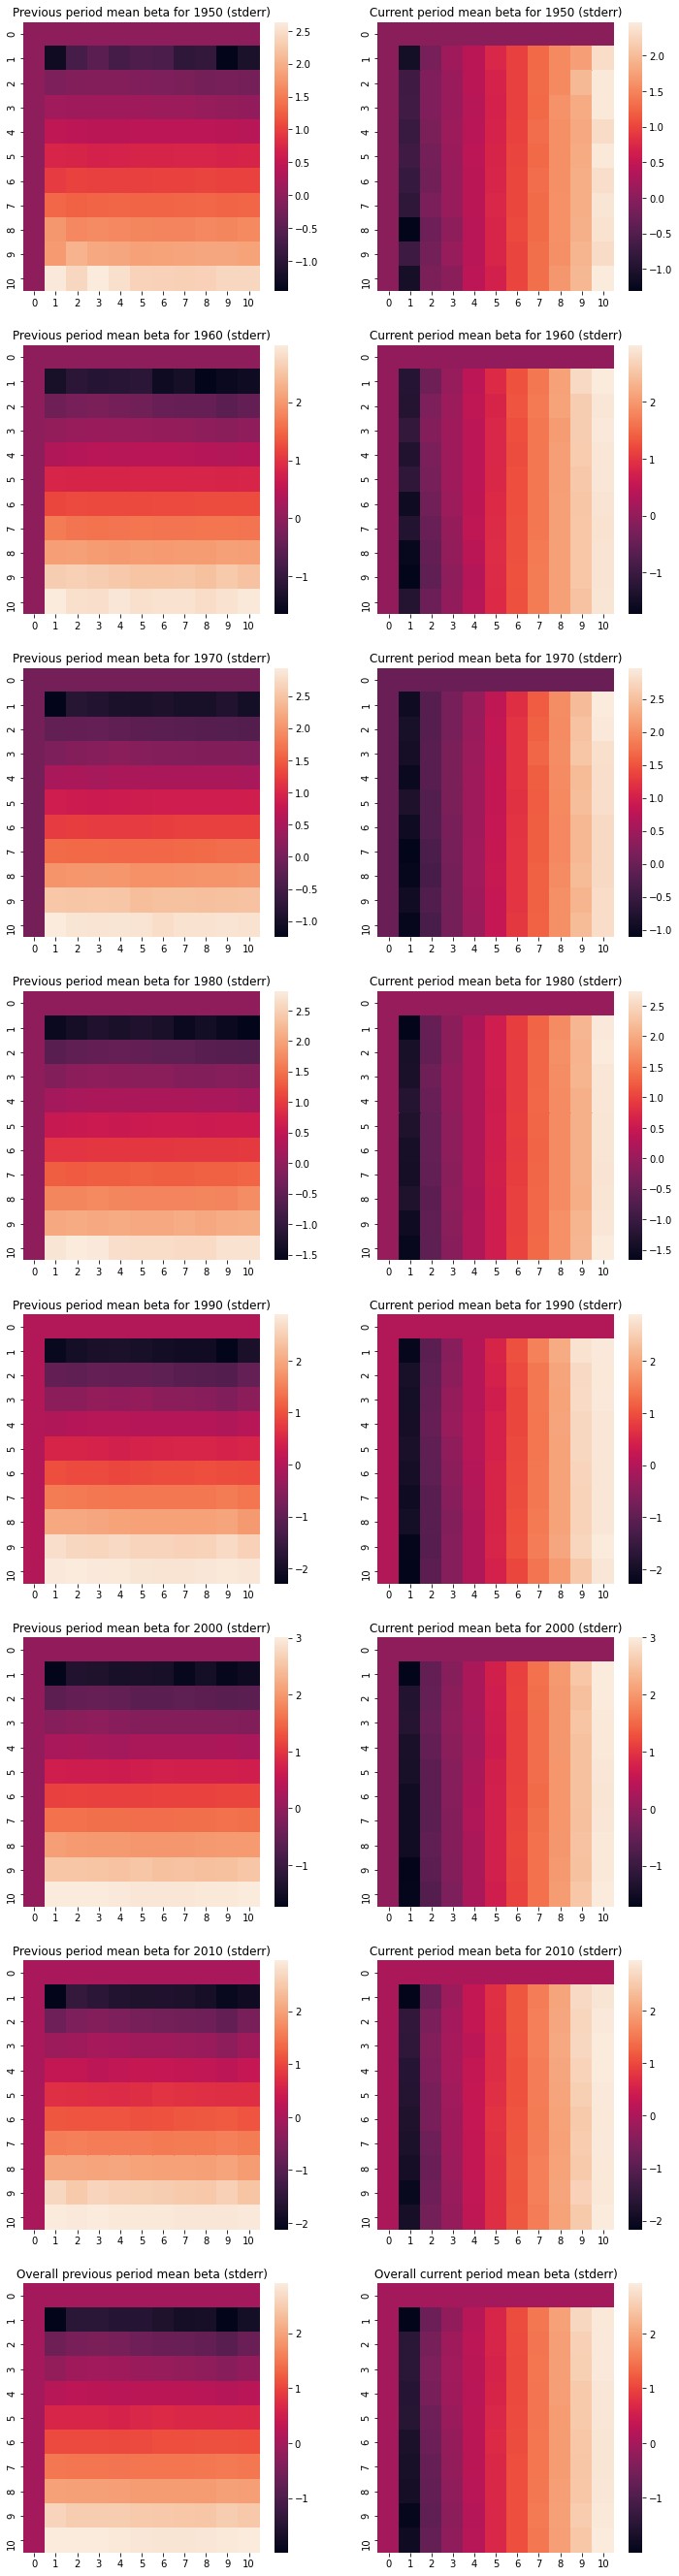

In [20]:
# averages by decile
fig, axes = plt.subplots(figsize=(12, 6*(n_decades + 1)), ncols=2, nrows=(n_decades + 1))
for i in range(n_decades):
    mat = np.load(f'wrds_results/ch3/prev_average_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][0])
    mat = np.load(f'wrds_results/ch3/post_average_mat_stderr_{1950 + i * 10}.npy')
    sns.heatmap(mat, ax=axes[i][1])
    
    axes[i][0].set_title(f'Previous period mean beta for {1950 + i * 10} (stderr)')
    axes[i][1].set_title(f'Current period mean beta for {1950 + i * 10} (stderr)')
    
mat = np.load(f'wrds_results/ch3/prev_average_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][0])
mat = np.load(f'wrds_results/ch3/post_average_mat_stderr_overall.npy')
sns.heatmap(mat, ax=axes[-1][1])

axes[-1][0].set_title(f'Overall previous period mean beta (stderr)')
axes[-1][1].set_title(f'Overall current period mean beta (stderr)')
    
plt.show()